# Cluster Analysis of Iris Data Set

I will investigate the Iris data set and look at the unsupervised machine learning technique "clustering."

`Unsupervised machine learning`: This is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision.

`Cluster Analysis` or `Clustering` is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

# Introduction to the data set

The iris flower data set was introduced in 1936 by British statistician and biologist Ronald Fisher.

`Objective`: segment the iris data (without labels) into clusters - 1, 2, 3 by k-means clustering and compare these clusters with the actual species clusters - setosa, versicolor, and virginica.

In [1]:
import pandas as pd
import numpy as np

In [4]:
iris = pd.read_csv("C:\\Users\\eliza\\OneDrive\\Documents\\Grayce\\Clustering\\iris.csv", encoding="Latin-1")

In [6]:
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [34]:
iris = iris.rename(columns={'Unnamed: 0': 'Iris Number'})
iris = iris.drop(columns=["Iris Number"])

In [35]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We have the columns `Sepal Length`, `Sepal Width`, `Petal Length`, `Petal Width`, and `Species`.

In [10]:
len(iris)

150

We have 150 row entries.

In [12]:
iris.describe()

,Iris Number,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Iris Number   150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


We have no null values, and no obvious outliers.

# Data Visualisation

Plotting the data to have a look at the features compared to each other.

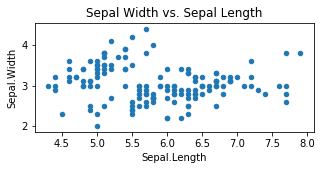

In [36]:
iris.plot(x="Sepal.Length", y="Sepal.Width", kind='scatter', title= "Sepal Width vs. Sepal Length", figsize=(5,2))

Using a scatter matrix to explore all correlations in more detail.

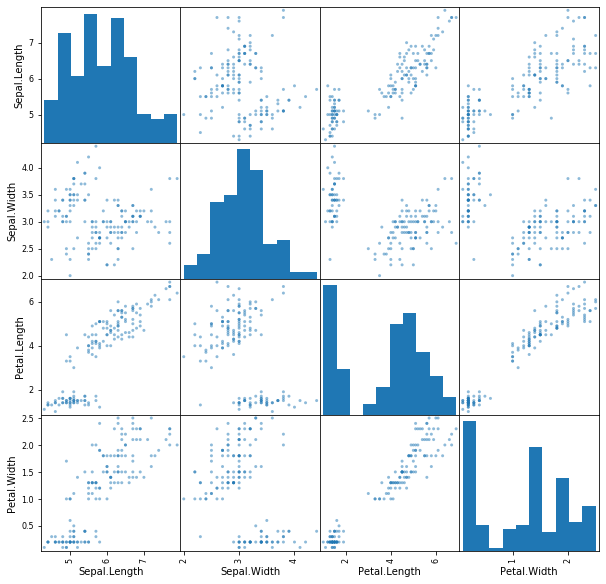

In [38]:
from pandas.plotting import scatter_matrix
scat = scatter_matrix(iris[['Sepal.Length','Sepal.Width', 'Petal.Length','Petal.Width']], figsize=(10,10))

`Petal Length` and `Petal Width` have strong positive correlations. Most variables have positive correlations, except `Sepal Width` and `Sepal Length`, which seem to have more random correlations.

# Exploring the data in more detail

Grouping by species instead to get a more detailed analysis.

In [40]:
iris["Species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

We have three unique species of iris: `setosa`, `versicolor`, `virginica`. 

In [44]:
setosa = iris.loc[iris["Species"] == "setosa"]
versicolor = iris.loc[iris["Species"] == "versicolor"]
virginica = iris.loc[iris["Species"] == "virginica"]

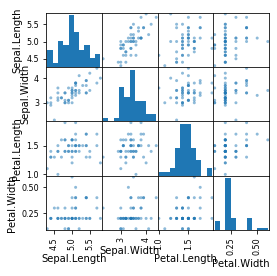

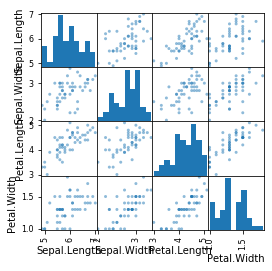

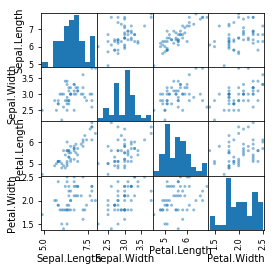

In [49]:
scat1 = scatter_matrix(setosa[['Sepal.Length','Sepal.Width', 'Petal.Length','Petal.Width']], figsize=(4,4))
scat2 = scatter_matrix(versicolor[['Sepal.Length','Sepal.Width', 'Petal.Length','Petal.Width']], figsize=(4,4))
scat3 = scatter_matrix(virginica[['Sepal.Length','Sepal.Width', 'Petal.Length','Petal.Width']], figsize=(4,4))

The setosa seem more randomly correlated than the others.

Plotting them on the same plot to see in more detail:

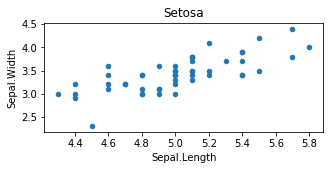

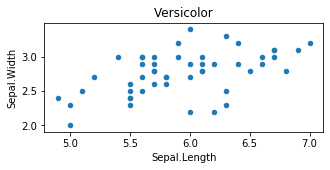

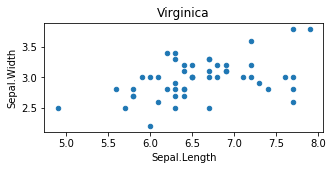

In [50]:
setosa.plot(x="Sepal.Length", y="Sepal.Width", kind='scatter', title= "Setosa", figsize=(5,2))
versicolor.plot(x="Sepal.Length", y="Sepal.Width", kind='scatter', title= "Versicolor", figsize=(5,2))
virginica.plot(x="Sepal.Length", y="Sepal.Width", kind='scatter', title= "Virginica", figsize=(5,2))

`Virignica` has the largest sepal length, followed by `Versicolor`, followed by `Setosa`. 

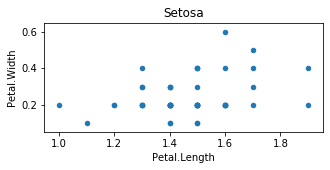

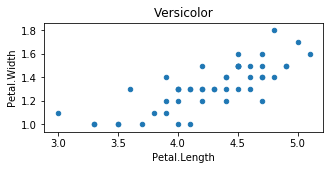

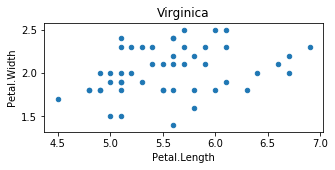

In [51]:
setosa.plot(x="Petal.Length", y="Petal.Width", kind='scatter', title= "Setosa", figsize=(5,2))
versicolor.plot(x="Petal.Length", y="Petal.Width", kind='scatter', title= "Versicolor", figsize=(5,2))
virginica.plot(x="Petal.Length", y="Petal.Width", kind='scatter', title= "Virginica", figsize=(5,2))

`Virginica` has the longest petal length, followed by `Versicolor`, followed by `Setosa`. `Virginica` has the greatest petal width, followed by `Versicolor`, followed by `Setosa`.

# Box Plots

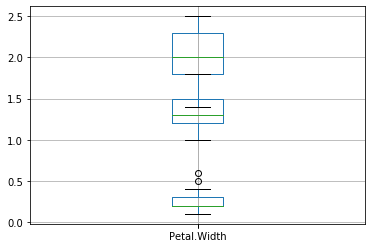

In [61]:
# fig, ax = 
# fig, ax = plt.subplots(ncols=4, figsize=(12, 5))
# ax.boxplot([setosa["Petal.Width"]])

setosa.boxplot(column=["Petal.Width"])

virginica.boxplot(column=["Petal.Width"])
versicolor.boxplot(column=["Petal.Width"])
#ax = setosa.boxplot(column=["Petal.Width"], return_type="axes")
#virginica.boxplot(column=["Petal.Width"], ax=ax)

Text(0.5, 1.0, 'Virginica')

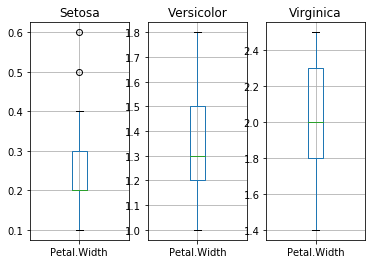

In [69]:
plt.subplot(1,3,1)
setosa.boxplot(column=["Petal.Width"])
plt.title("Setosa")

plt.subplot(1,3,2)
versicolor.boxplot(column=["Petal.Width"])
plt.title("Versicolor")

plt.subplot(1,3,3)
virginica.boxplot(column=["Petal.Width"])
plt.title("Virginica")

Text(0.5, 1.0, 'Virginica')

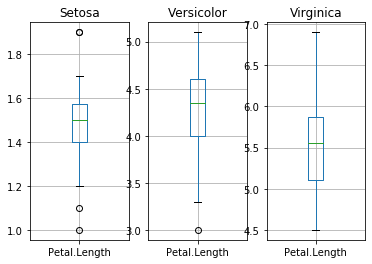

In [70]:
plt.subplot(1,3,1)
setosa.boxplot(column=["Petal.Length"])
plt.title("Setosa")

plt.subplot(1,3,2)
versicolor.boxplot(column=["Petal.Length"])
plt.title("Versicolor")

plt.subplot(1,3,3)
virginica.boxplot(column=["Petal.Length"])
plt.title("Virginica")

Text(0.5, 1.0, 'Virginica')

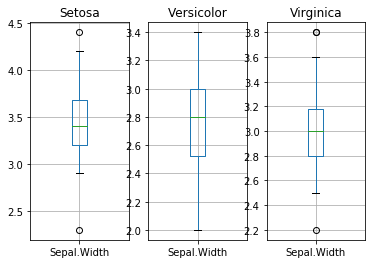

In [71]:
plt.subplot(1,3,1)
setosa.boxplot(column=["Sepal.Width"])
plt.title("Setosa")

plt.subplot(1,3,2)
versicolor.boxplot(column=["Sepal.Width"])
plt.title("Versicolor")

plt.subplot(1,3,3)
virginica.boxplot(column=["Sepal.Width"])
plt.title("Virginica")

Text(0.5, 1.0, 'Virginica')

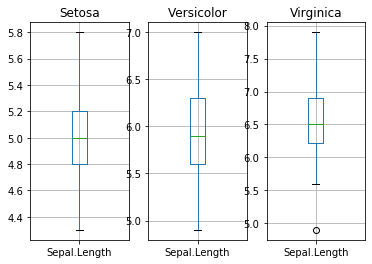

In [72]:
plt.subplot(1,3,1)
setosa.boxplot(column=["Sepal.Length"])
plt.title("Setosa")

plt.subplot(1,3,2)
versicolor.boxplot(column=["Sepal.Length"])
plt.title("Versicolor")

plt.subplot(1,3,3)
virginica.boxplot(column=["Sepal.Length"])
plt.title("Virginica")

# Clustering

K-means is the most popular method of clustering, followed by hierarchical. This is unsupervised machine learning, i.e. categorizing data into buckets.

# K-Means Clustering
`Step 1`: Select random centroids, if there are k groups then select k random centroids.

`Step 2`: Take each point and find the nearest centroid. Normally use Euclidean distance.

`Step 3`: Run through an iterative cycle of matching each point to the closest centroid until we get a more accurate representation of the centroids of each cluster.

K-means is the most frequently used form of clustering due to its speed and simplicity.

# Using the `Elbow Method`
I am using the `Elbow Method` to find the optimum number of clusters for classification. I am expecting to get three clusters

[[3.5 1.4 0.2]
 [3.  1.4 0.2]
 [3.2 1.3 0.2]
 [3.1 1.5 0.2]
 [3.6 1.4 0.2]
 [3.9 1.7 0.4]
 [3.4 1.4 0.3]
 [3.4 1.5 0.2]
 [2.9 1.4 0.2]
 [3.1 1.5 0.1]
 [3.7 1.5 0.2]
 [3.4 1.6 0.2]
 [3.  1.4 0.1]
 [3.  1.1 0.1]
 [4.  1.2 0.2]
 [4.4 1.5 0.4]
 [3.9 1.3 0.4]
 [3.5 1.4 0.3]
 [3.8 1.7 0.3]
 [3.8 1.5 0.3]
 [3.4 1.7 0.2]
 [3.7 1.5 0.4]
 [3.6 1.  0.2]
 [3.3 1.7 0.5]
 [3.4 1.9 0.2]
 [3.  1.6 0.2]
 [3.4 1.6 0.4]
 [3.5 1.5 0.2]
 [3.4 1.4 0.2]
 [3.2 1.6 0.2]
 [3.1 1.6 0.2]
 [3.4 1.5 0.4]
 [4.1 1.5 0.1]
 [4.2 1.4 0.2]
 [3.1 1.5 0.2]
 [3.2 1.2 0.2]
 [3.5 1.3 0.2]
 [3.6 1.4 0.1]
 [3.  1.3 0.2]
 [3.4 1.5 0.2]
 [3.5 1.3 0.3]
 [2.3 1.3 0.3]
 [3.2 1.3 0.2]
 [3.5 1.6 0.6]
 [3.8 1.9 0.4]
 [3.  1.4 0.3]
 [3.8 1.6 0.2]
 [3.2 1.4 0.2]
 [3.7 1.5 0.2]
 [3.3 1.4 0.2]
 [3.2 4.7 1.4]
 [3.2 4.5 1.5]
 [3.1 4.9 1.5]
 [2.3 4.  1.3]
 [2.8 4.6 1.5]
 [2.8 4.5 1.3]
 [3.3 4.7 1.6]
 [2.4 3.3 1. ]
 [2.9 4.6 1.3]
 [2.7 3.9 1.4]
 [2.  3.5 1. ]
 [3.  4.2 1.5]
 [2.2 4.  1. ]
 [2.9 4.7 1.4]
 [2.9 3.6 1.3]
 [3.1 4.4 1.4]
 [3.  4.5 

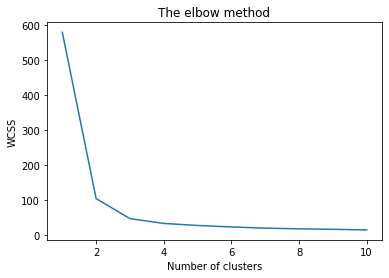

In [79]:
from sklearn.cluster import KMeans
wcss = []
x = iris.iloc[:, [1, 2, 3]].values
print(x)

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The elbow occurs at 3 so this is the optimum number of clusters.

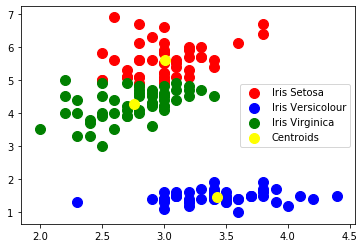

In [81]:
# Running k-means in Python

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris Setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris Versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()


To conclude, by using the unsupervised machine learning algorithm of clustering we found three subspecies of iris correctly classified.